Correlation of GDP to Happiness Score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
df1 = pd.read_csv('2015.csv')
df2 = pd.read_csv('2016.csv')
df3 = pd.read_csv('2017.csv')

In [3]:
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.5870,0.0341,1.3965,1.3495,0.9414,0.6656,0.4198,0.2968,2.5174
1,Iceland,Western Europe,2,7.5610,0.0488,1.3023,1.4022,0.9478,0.6288,0.1414,0.4363,2.7020
2,Denmark,Western Europe,3,7.5270,0.0333,1.3255,1.3606,0.8746,0.6494,0.4836,0.3414,2.4920
3,Norway,Western Europe,4,7.5220,0.0388,1.4590,1.3310,0.8852,0.6697,0.3650,0.3470,2.4653
4,Canada,North America,5,7.4270,0.0355,1.3263,1.3226,0.9056,0.6330,0.3296,0.4581,2.4518


In [4]:
happ_score = pd.merge(df1[['Country','Happiness Score']],
                      df2[['Country','Happiness Score']], 
                      on = 'Country', how = 'inner')

happ_score.rename(columns={'Happiness Score_x': 'Happiness Score 2015', 
                           'Happiness Score_y': 'Happiness Score 2016'}, 
                            inplace = True)

happ_score = pd.merge(happ_score,df3[['Country','Happiness Score']], 
                                      on = 'Country', how = 'inner')

happ_score.rename(columns={'Happiness Score': 'Happiness Score 2017'}, inplace = True)

happ_score.head(10)

,Country,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017
0,Switzerland,7.5870,7.5090,7.4940
1,Iceland,7.5610,7.5010,7.5040
2,Denmark,7.5270,7.5260,7.5220
3,Norway,7.5220,7.4980,7.5370
4,Canada,7.4270,7.4040,7.3160
5,Finland,7.4060,7.4130,7.4690
6,Netherlands,7.3780,7.3390,7.3770
7,Sweden,7.3640,7.2910,7.2840
8,New Zealand,7.2860,7.3340,7.3140
9,Australia,7.2840,7.3130,7.2840


In [5]:
happ_score.fillna(len(happ_score), inplace = True)

In [6]:
happ_score.head(10)

,Country,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017
0,Switzerland,7.5870,7.5090,7.4940
1,Iceland,7.5610,7.5010,7.5040
2,Denmark,7.5270,7.5260,7.5220
3,Norway,7.5220,7.4980,7.5370
4,Canada,7.4270,7.4040,7.3160
5,Finland,7.4060,7.4130,7.4690
6,Netherlands,7.3780,7.3390,7.3770
7,Sweden,7.3640,7.2910,7.2840
8,New Zealand,7.2860,7.3340,7.3140
9,Australia,7.2840,7.3130,7.2840


In [7]:
happ_score.fillna(len(happ_score), inplace = True)

In [8]:
happ_gdp = pd.merge(df1[['Country','Economy (GDP per Capita)']],
                      df2[['Country','Economy (GDP per Capita)']], 
                      on = 'Country', how = 'inner')

happ_gdp.rename(columns={'Economy (GDP per Capita)_x': 'GDP 2015', 
                           'Economy (GDP per Capita)_y': 'GDP 2016'}, 
                            inplace = True)

happ_gdp = pd.merge(happ_gdp,df3[['Country','Economy (GDP per Capita)']], 
                      on = 'Country', how = 'inner')

happ_gdp.rename(columns={'Economy (GDP per Capita)': 'GDP 2017'}, inplace = True)

happ_gdp.fillna(0)

happ_gdp.head(10)

,Country,GDP 2015,GDP 2016,GDP 2017
0,Switzerland,1.3965,1.5273,1.5650
1,Iceland,1.3023,1.4267,1.4806
2,Denmark,1.3255,1.4418,1.4824
3,Norway,1.4590,1.5774,1.6165
4,Canada,1.3263,1.4402,1.4792
5,Finland,1.2902,1.4060,1.4436
6,Netherlands,1.3294,1.4647,1.5039
7,Sweden,1.3317,1.4518,1.4944
8,New Zealand,1.2502,1.3607,1.4057
9,Australia,1.3336,1.4444,1.4844


In [9]:
score_and_gdp = pd.merge(happ_score, happ_gdp, on = 'Country', how = 'inner')

In [10]:
score_and_gdp.head()

,Country,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,GDP 2015,GDP 2016,GDP 2017
0,Switzerland,7.5870,7.5090,7.4940,1.3965,1.5273,1.5650
1,Iceland,7.5610,7.5010,7.5040,1.3023,1.4267,1.4806
2,Denmark,7.5270,7.5260,7.5220,1.3255,1.4418,1.4824
3,Norway,7.5220,7.4980,7.5370,1.4590,1.5774,1.6165
4,Canada,7.4270,7.4040,7.3160,1.3263,1.4402,1.4792


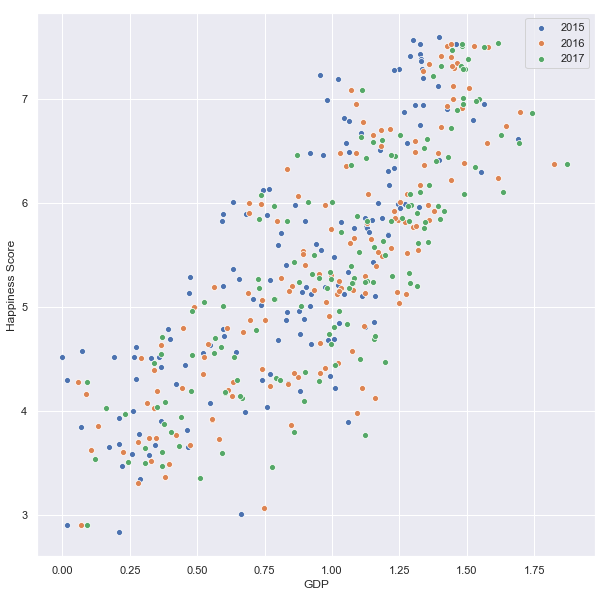

In [11]:
sns.set(rc={'figure.figsize':(10,10)})

stat_15 = sns.scatterplot(y='Happiness Score 2015', x='GDP 2015', data = score_and_gdp, label = '2015')
stat_16 = sns.scatterplot(y='Happiness Score 2016', x='GDP 2016', data = score_and_gdp, label = '2016')
stat_17 = sns.scatterplot(y='Happiness Score 2017', x='GDP 2017', data = score_and_gdp, label = '2017')
plt.ylabel("Happiness Score")
plt.xlabel("GDP")
plt.show()

                      Happiness Score 2015  GDP 2015
Happiness Score 2015                1.0000    0.7844
GDP 2015                            0.7844    1.0000


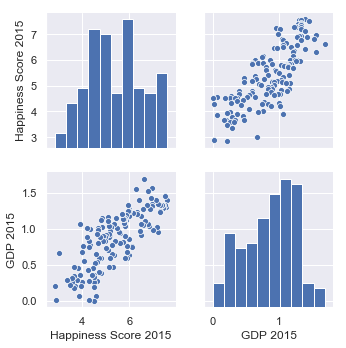

In [50]:
g = sns.pairplot(score_and_gdp[['Happiness Score 2015','GDP 2015']])
print(score_and_gdp[['Happiness Score 2015','GDP 2015']].corr())